In [40]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Multiply
from keras.layers import ELU, PReLU, LeakyReLU
from keras.models import Model
from keras.utils.vis_utils import plot_model
from tensorflow.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras import metrics
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121

from tensorflow.keras.layers import GlobalAveragePooling2D

from keras import backend as K

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import math as m
import numpy as np
import seaborn as sns
import os
import json

sns.set_style("darkgrid")
edgecolors=None

config = tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth=True

sess = tf.compat.v1.Session(config=config)


2023-05-08 19:29:20.732462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-08 19:29:20.733933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
'''
Nomenclature:

<DATASET-INITIALS><FRUIT-INITIAL><TEST-INITIAL>.csv|.pkl

DATASET-INITIALS:
CG = Classic Geometry
F = Form
C = Color
A = All
CI = Cropped Images

FRUIT-INITIAL:
B = Blueberry
R = Raspberry
S = Strawberry

TEST-INITIAL:
R = Raw
Y = YOLO
D = Detectron2

---------------------

EXAMPLES

CLASSIC GEOMETRY of RASPBERRIES from RAW test
CGRR.csv

CROPPED IMAGES of BLUEBERRIES from YOLO test
CIBY.pkl

---------------------

Cropped images are the only datasets that are saved in a pickle file


'''

#-----------------Blueberries------------------
###############################################
#Blueberries - RAW
#ClassicGeometry
!wget -O CGBR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryBlueberriesRaw.csv
#Form
!wget -O FBR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsBlueberriesRaw.csv
#Color
!wget -O CBR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsBlueberriesRaw.csv
#All
!wget -O ABR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesBlueberriesRaw.csv
#Images
!wget -O CIBR.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesBlueberriesRaw.pkl
###############################################
#Blueberries - YOLO
#ClassicGeometry
!wget -O CGBY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryYOLOBlue.csv
#Form
!wget -O FBY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsYOLOBlue.csv
#Color
!wget -O CBY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsYOLOBlue.csv
#All
!wget -O ABY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesYOLOBlue.csv
#Images
!wget -O CIBY.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesBlueberriesYOLO.pkl
###############################################
#Blueberries - Detectron2
#ClassicGeometry
!wget -O CGBD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryDetectron2blue.csv
#Form
!wget -O FBD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsDetectron2blue.csv
#Color
!wget -O CBD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsDetectron2blue.csv
#All
!wget -O ABD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2blue.csv
#Images
!wget -O CIBD.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesBlueberriesDetectron.pkl
###############################################
#----------------------------------------------

#==============================================
#-----------------Raspberries------------------
###############################################
#Raspberries - RAW
#ClassicGeometry
!wget -O CGRR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryRaspberriesRaw.csv
#Form
!wget -O FRR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsRaspberriesRaw.csv
#Color
!wget -O CRR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsRaspberriesRaw.csv
#All
!wget -O ARR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesRaspberriesRaw.csv
#Images
!wget -O CIRR.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesRaspberriesRaw.pkl
###############################################
#Raspberries - YOLO
#ClassicGeometry
!wget -O CGRY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryYOLORasp.csv
#Form
!wget -O FRY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsYOLORasp.csv
#Color
!wget -O CRY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsYOLORasp.csv
#All
!wget -O ARY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesYOLORasp.csv
#Images
!wget -O CIRY.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesRaspberriesYOLO.pkl
###############################################
#Raspberries - Detectron2
#ClassicGeometry
!wget -O CGRD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryDetectron2rasp.csv
#Form
!wget -O FRD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsDetectron2rasp.csv
#Color
!wget -O CRD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsDetectron2rasp.csv
#All
!wget -O ARD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2rasp.csv
#Images
!wget -O CIRD.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesRaspberriesDetectron.pkl
###############################################
#----------------------------------------------

#==============================================
#-----------------Strawberries------------------
###############################################
#Strawberries - RAW
#ClassicGeometry
!wget -O CGSR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryStrawberriesRaw.csv
#Form
!wget -O FSR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsStrawberriesRaw.csv
#Color
!wget -O CSR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsStrawberriesRaw.csv
#All
!wget -O ASR.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesStrawberriesRaw.csv
#Images
!wget -O CISR.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesStrawberriesRaw.pkl
###############################################
#Strawberries - YOLO
#ClassicGeometry
!wget -O CGSY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryStrawberriesYOLO.csv
#Form
!wget -O FSY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsStrawberriesYOLO.csv
#Color
!wget -O CSY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsStrawberriesYOLO.csv
#All
!wget -O ASY.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesStrawberriesYOLO.csv
#Images
!wget -O CISY.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesStrawberriesYOLO.pkl
###############################################
#Strawberries - Detectron2
#ClassicGeometry
!wget -O CGSD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryDetectron2straw.csv
#Form
!wget -O FSD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsDetectron2straw.csv
#Color
!wget -O CSD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colorsDetectron2straw.csv
#All
!wget -O ASD.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2straw.csv
#Images
!wget -O CISD.pkl https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/croppedimagesStrawberriesDetectron.pkl
###############################################
#----------------------------------------------

#==============================================

%mkdir figures




--2023-05-08 17:38:28--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometryBlueberriesRaw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3594 (3.5K) [text/plain]
Saving to: ‘CGBR.csv’

CGBR.csv            100%[===================>]   3.51K  --.-KB/s    in 0s      

2023-05-08 17:38:29 (22.5 MB/s) - ‘CGBR.csv’ saved [3594/3594]

--2023-05-08 17:38:29--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humomentsBlueberriesRaw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19645 (

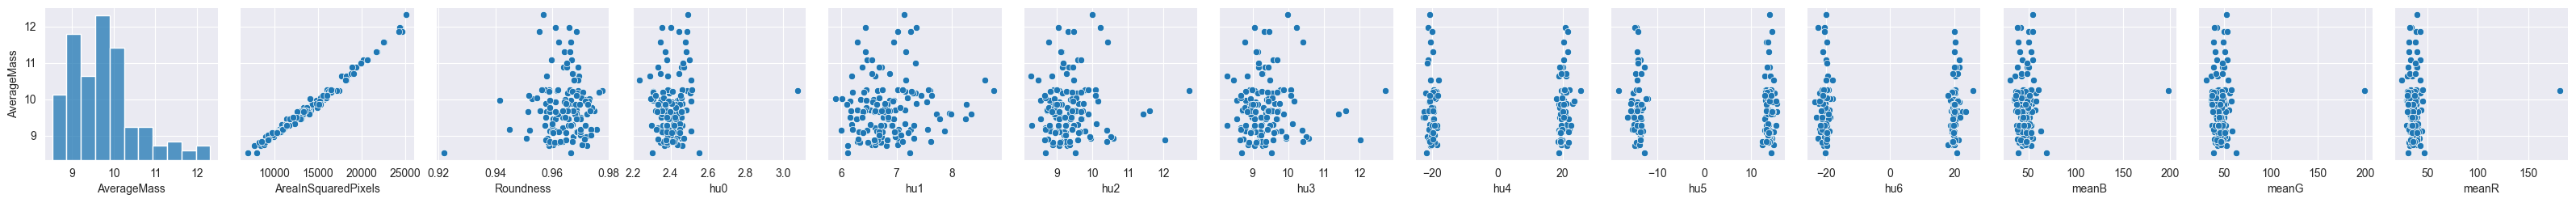

In [10]:
dataset = "ABD"

testdf = pd.read_csv(dataset + ".csv")

testdf = testdf.drop(['ID'], axis=1)

type_of_plot = "pairplot"

pp = sns.pairplot(data=testdf, y_vars=['AverageMass'])

plt.savefig("./figures/" + dataset + type_of_plot, dpi=300)




Dataframe 1:
   AverageMass       hu0       hu1        hu2        hu3        hu4  \
0      10.2444  3.077489  8.760132  12.724453  12.724453  25.631926   
1      10.2427  2.488123  7.603846   9.782211   9.782211  20.117998   

         hu5        hu6  
0 -18.188263  25.685589  
1  14.142819  20.209781  
Dataframe 2:
   AverageMass  AreaInSquaredPixels  Roundness       meanB       meanG  \
0      10.2444              17387.0     0.9776  198.304607  199.058058   
1      10.2427              17131.5     0.9693   54.096811   53.609179   

        meanR  
0  181.721354  
1   43.961714  


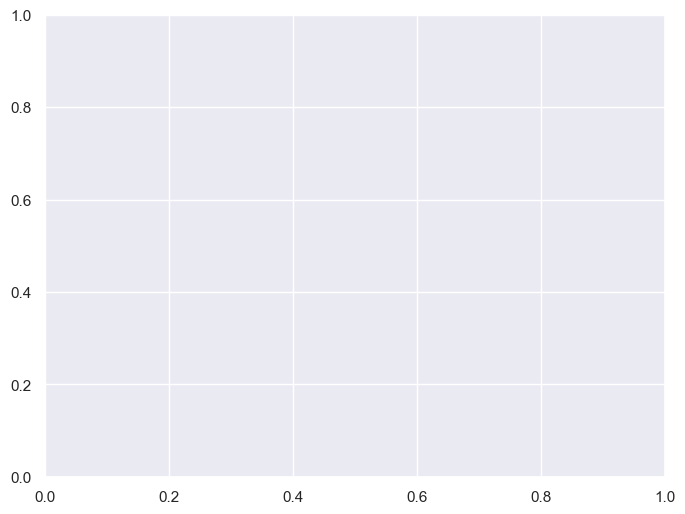

<Figure size 2000x250 with 0 Axes>

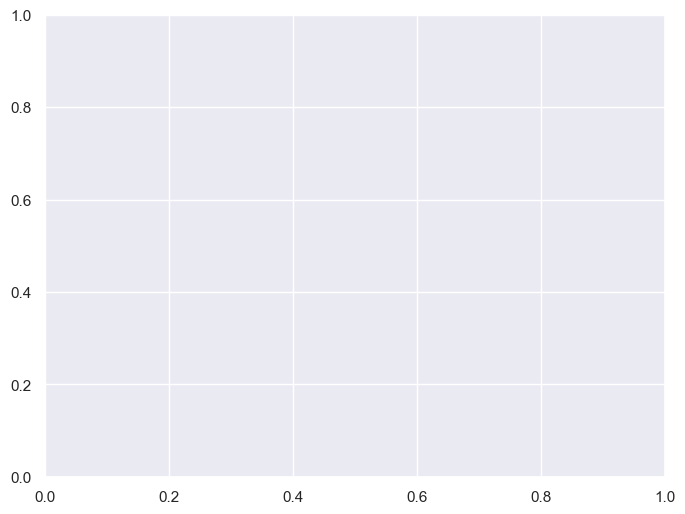

<Figure size 1500x250 with 0 Axes>

<Figure size 800x600 with 0 Axes>

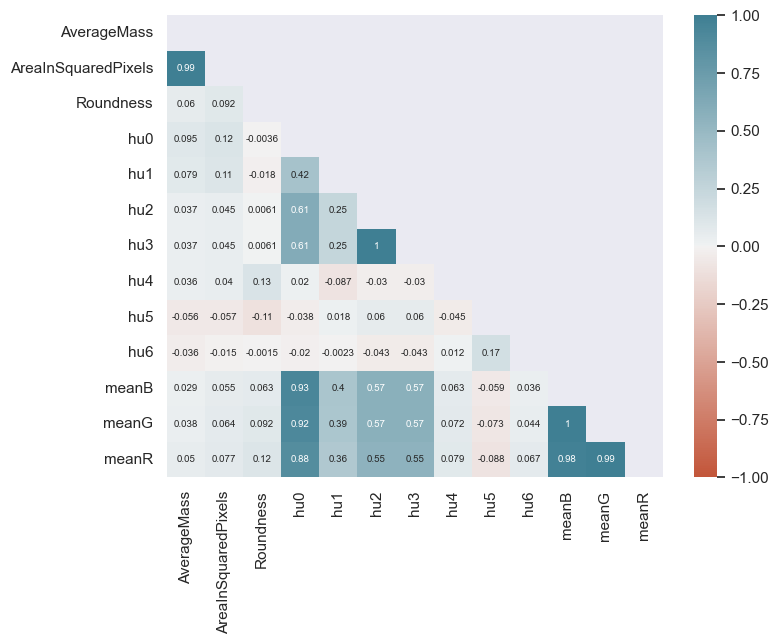

In [55]:


foldersuffix = "Correlations"
dataset = "ABD"

directoryName = dataset + '-' + foldersuffix

path = os.path.join("figures", directoryName)
  
os.mkdir(path)

testdf = pd.read_csv(dataset + ".csv")

testdf = testdf.drop(['ID'], axis=1)

df1 = testdf.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9]] 
df2 = pd.concat([testdf.iloc[:, 0], testdf.iloc[:, [1, 2, 10, 11, 12]]], axis=1) 

print("Dataframe 1:")
print(df1.head(2))
print("Dataframe 2:")
print(df2.head(2))

type_of_plot = "Pairplot"

dataorigin = "Hu"
fig, ax = plt.subplots(figsize=(8, 6))

savestring = dataset + type_of_plot + dataorigin
pp = sns.pairplot(data=df1, y_vars=['AverageMass'])

plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
plt.clf()

dataorigin = "Geometry"
fig, ax = plt.subplots(figsize=(8, 6))

savestring = dataset + type_of_plot + dataorigin
pp = sns.pairplot(data=df2, y_vars=['AverageMass'])

plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
plt.clf()

dataorigin = "All"
type_of_plot = "CorrelationCoefficient"
fig, ax = plt.subplots(figsize=(8, 6))

savestring = dataset + type_of_plot + dataorigin
pp = testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()
pp.set_title("Correlation with AverageMass")
pp.set_xlabel("Correlation coefficient")

# save the figure to a file
plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")
#plt.savefig("./figures/" + savestring, dpi=300)


plt.clf()


dataorigin = "All"
type_of_plot = "CorrelationHeatmap"
fig, ax = plt.subplots(figsize=(8, 6))

corrmat = testdf.corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

savestring = dataset + type_of_plot + dataorigin



plt.savefig("./figures/" +  dataset + '-' + foldersuffix + '/' + savestring, dpi=300, bbox_inches="tight")


In [ ]:
testdf = testdf.drop(['ID'], axis=1)
testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()

In [25]:
sns.set(style="ticks")

testdf = sns.load_dataset("data",testdf)

# create a FacetGrid with two columns
g = sns.FacetGrid(testdf, col="", height=4, aspect=1.2)

# plot the pairwise relationships between columns using pairplot
g.map(sns.pairplot, y_vars=['AverageMass'])

# adjust the subplot spacing
plt.subplots_adjust(wspace=0.4)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
testdf.hist(figsize = (12,10))
plt.show()

In [ ]:
testdf = pd.read_csv("allfeaturesStrawberriesRaw.csv")
testdf = testdf.drop(['ID'], axis=1)
testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()

In [ ]:
testdf.corr().style.background_gradient(cmap='coolwarm')


In [ ]:

corrmat = testdf.corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))